In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
sns.set(font_scale=1.8) 
rc("font", family = font_name)

In [3]:
sess = pd.read_csv('project/new_session.csv')
prod = pd.read_csv('project/new_product.csv')

In [4]:
sess_mob = sess[sess['DVC_CTG_NM'] == 'mobile'][['CLNT_ID', 'SESS_ID', 'TOT_SESS_HR_V', 'TOT_PAG_VIEW_CT']]
sess_desk = sess[sess['DVC_CTG_NM'] == 'desktop'][['CLNT_ID', 'SESS_ID', 'TOT_SESS_HR_V', 'TOT_PAG_VIEW_CT']]

In [5]:
sess_mob = sess_mob.pivot_table(['TOT_SESS_HR_V', 'TOT_PAG_VIEW_CT'], 'CLNT_ID', aggfunc='sum')
sess_mob.head()

,TOT_PAG_VIEW_CT,TOT_SESS_HR_V
CLNT_ID,,
8,93.0,834.0
14,256.0,7098.0
32,205.0,3981.0
56,93.0,2130.0
58,195.0,3161.0


In [6]:
prod_count = prod.groupby('CLNT_ID')[['PD_BUY_CT']].sum()
prod_count.head()

,PD_BUY_CT
CLNT_ID,
8,2
14,2
25,4
32,5
33,5


In [31]:
from scipy import stats

zscore = stats.zscore(prod_count['PD_BUY_CT'].sort_values())
print(np.where(zscore > 3))

(array([915142, 915143, 915144, ..., 922724, 922725, 922726], dtype=int64),)


In [45]:
prod_count[['PD_BUY_CT']].sort_values('PD_BUY_CT').reset_index().loc[915138:915142]

,CLNT_ID,PD_BUY_CT
915138,5676167,61
915139,2142575,61
915140,1889606,61
915141,5203074,61
915142,2462561,62


C:\Users\acorn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


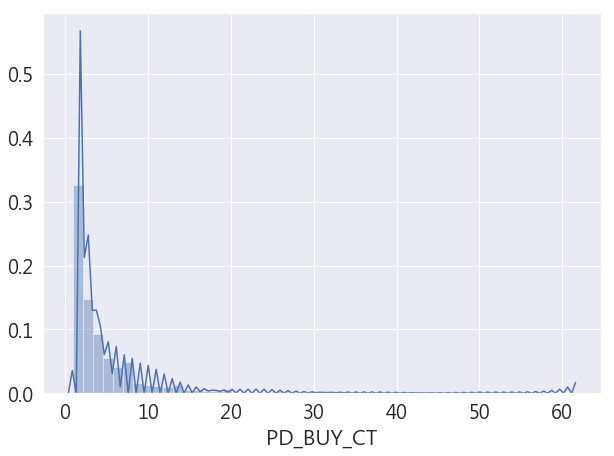

In [8]:
plt.figure(figsize=(10,7))
ax = sns.distplot(prod_count['PD_BUY_CT'][prod_count['PD_BUY_CT'] < 62])

In [9]:
adj_buy_page = pd.merge(prod_count[['PD_BUY_CT']][prod_count['PD_BUY_CT'] < 62], sess_mob[['TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V']], on='CLNT_ID')

In [22]:
adj_buy_page.head()

,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V
CLNT_ID,,,
8,2,93.0,834.0
14,2,256.0,7098.0
32,5,205.0,3981.0
56,3,93.0,2130.0
58,6,195.0,3161.0


Text(0, 0.5, '구매수')

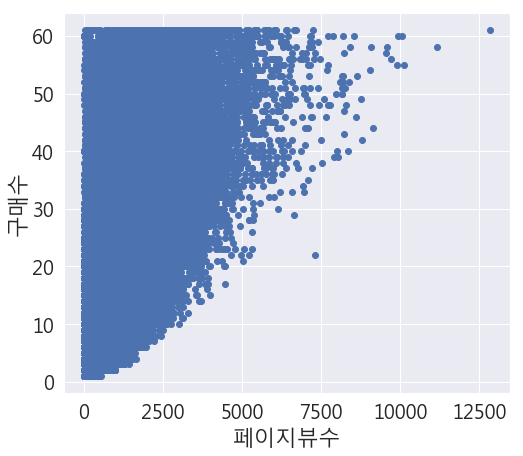

In [10]:
plt.figure(figsize=(8,7))
ax = plt.scatter(adj_buy_page['TOT_PAG_VIEW_CT'], adj_buy_page['PD_BUY_CT'])

plt.xlabel('페이지뷰수')
plt.ylabel('구매수')

In [11]:
# from sklearn import preprocessing
# from sklearn.preprocessing import normalize

# adj_buy_page[['TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V']]

# min_max_scaler = preprocessing.MinMaxScaler()
# adj_buy_page[['TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V']] = min_max_scaler.fit_transform(adj_buy_page[['TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V']])

# adj_buy_page['concern'] = ((adj_buy_page['TOT_SESS_HR_V']**2) + (adj_buy_page['TOT_PAG_VIEW_CT']**2))**(1/2)/con['PD_BUY_CT']

# adj_buy_page = adj_buy_page.pivot_table('concern', 'PD_BUY_CT')

# plt.plot(concern.index, concern['concern'])

In [12]:
prod_price = pd.read_csv('project/prod_price.csv')

In [13]:
count_total = prod_price[prod_price['PD_BUY_CT']<62].pivot_table('TOTAL', 'PD_BUY_CT').reset_index()

C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


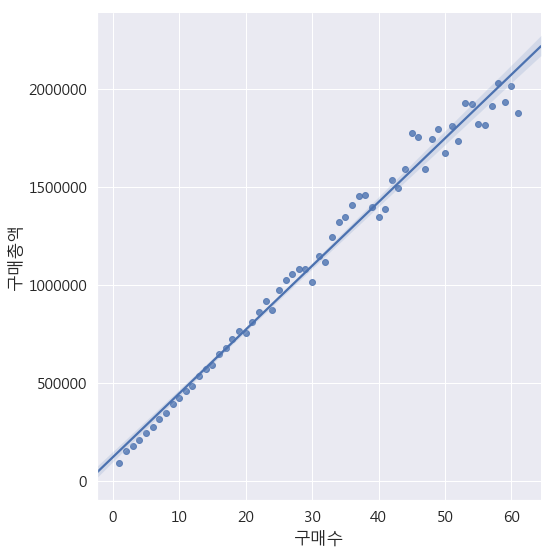

In [14]:
sns.set(font_scale=1.4) 
rc("font", family = font_name)

ax = sns.lmplot(x='PD_BUY_CT', y = 'TOTAL', data=count_total, size=8)
ax.set(xlabel='구매수', ylabel='구매총액')

In [15]:
x = pd.merge(prod.pivot_table('PD_BUY_CT', 'CLNT_ID', aggfunc='sum'), prod.drop_duplicates(['CLNT_ID','PD_C']).pivot_table('PD_C', 'CLNT_ID', aggfunc='count'), on='CLNT_ID')

In [16]:
x2 = pd.merge(sess_mob, x, on='CLNT_ID')

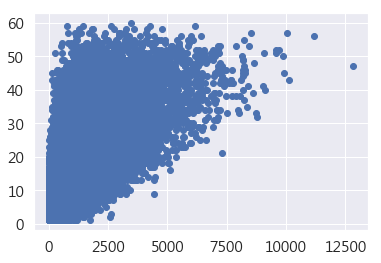

In [17]:
plt.scatter('TOT_PAG_VIEW_CT', 'PD_C', data=x2[x2['PD_BUY_CT']<62])

C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


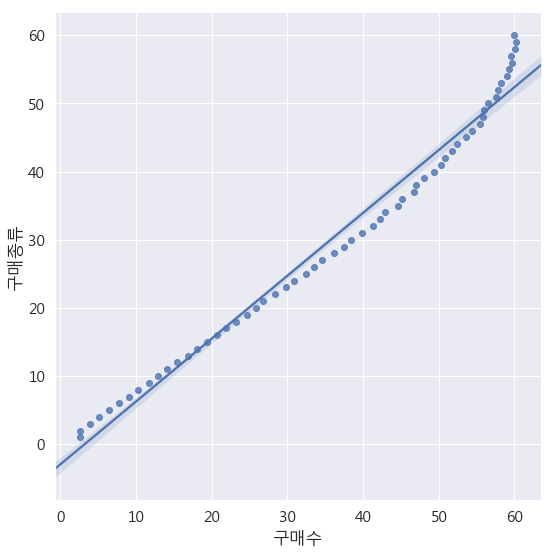

In [18]:
sns.set(font_scale=1.4) 
rc("font", family = font_name)
ax = sns.lmplot(x='PD_BUY_CT', y = 'PD_C', data=x2[x2['PD_BUY_CT']<62].pivot_table('PD_BUY_CT', 'PD_C').reset_index(), size=8)
ax.set(xlabel='구매수', ylabel='구매종류')

In [19]:
a=True
b=True

for i in range(10000):
    equation = len(adj_buy_page[(adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])<(i/10000)])
    if equation>=169191.5 and a:
        a=False
        print(i/10000)
        
    elif equation>=169191.5*2 and b:
        b=False
        print(i/10000)
        
    elif equation>=169191.5*3:
        print(i/10000)
        break

0.016
0.0261
0.0455


(0, 62)

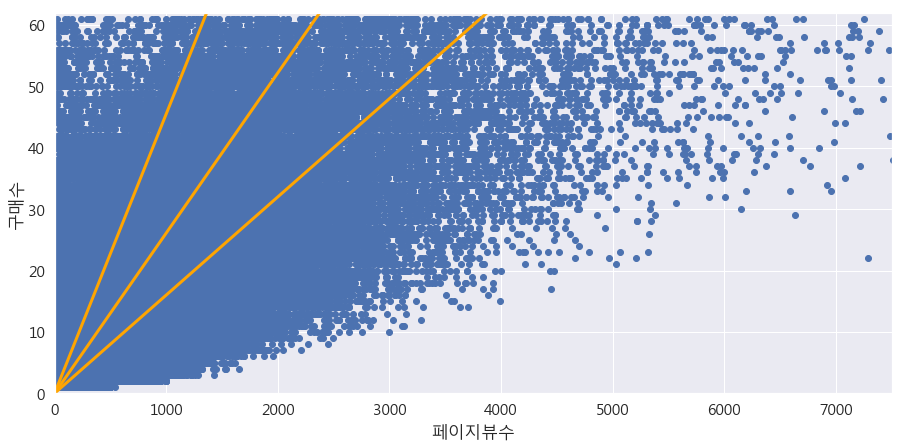

In [20]:
plt.figure(figsize=(15,7))
ax = plt.scatter(adj_buy_page['TOT_PAG_VIEW_CT'], adj_buy_page['PD_BUY_CT'])

x = np.linspace(0,5000,100)
y = [0.016*x, 0.0261*x, 0.0455*x]
plt.plot(x, y[0], color='orange', linewidth=3.0)
plt.plot(x, y[1], color='orange', linewidth=3.0)
plt.plot(x, y[2], color='orange', linewidth=3.0)

plt.xlabel('페이지뷰수')
plt.ylabel('구매수')

plt.xlim(0,7500)
plt.ylim(0,62)

In [21]:
adj_buy_page[(adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])>0.0455].to_csv('project/q1.csv', sep=',', encoding='utf-8')
adj_buy_page[((adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])>0.0261) & ((adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])<=0.0455)].to_csv('project/q2.csv', sep=',', encoding='utf-8')
adj_buy_page[((adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])>0.016) & ((adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])<=0.0261)].to_csv('project/q3.csv', sep=',', encoding='utf-8')
adj_buy_page[(adj_buy_page['PD_BUY_CT']/adj_buy_page['TOT_PAG_VIEW_CT'])<=0.016].to_csv('project/q4.csv', sep=',', encoding='utf-8')